# Assignment 1

### A. 
For the 4 data sets of mock_data_1.txt, mock_data_2.txt, mock_data_3.txt, mock_data_4.txt (10000 values in each set) attached to this email plot the binned data. Try to choose a reasonable bin size. What is your visual interpretation?

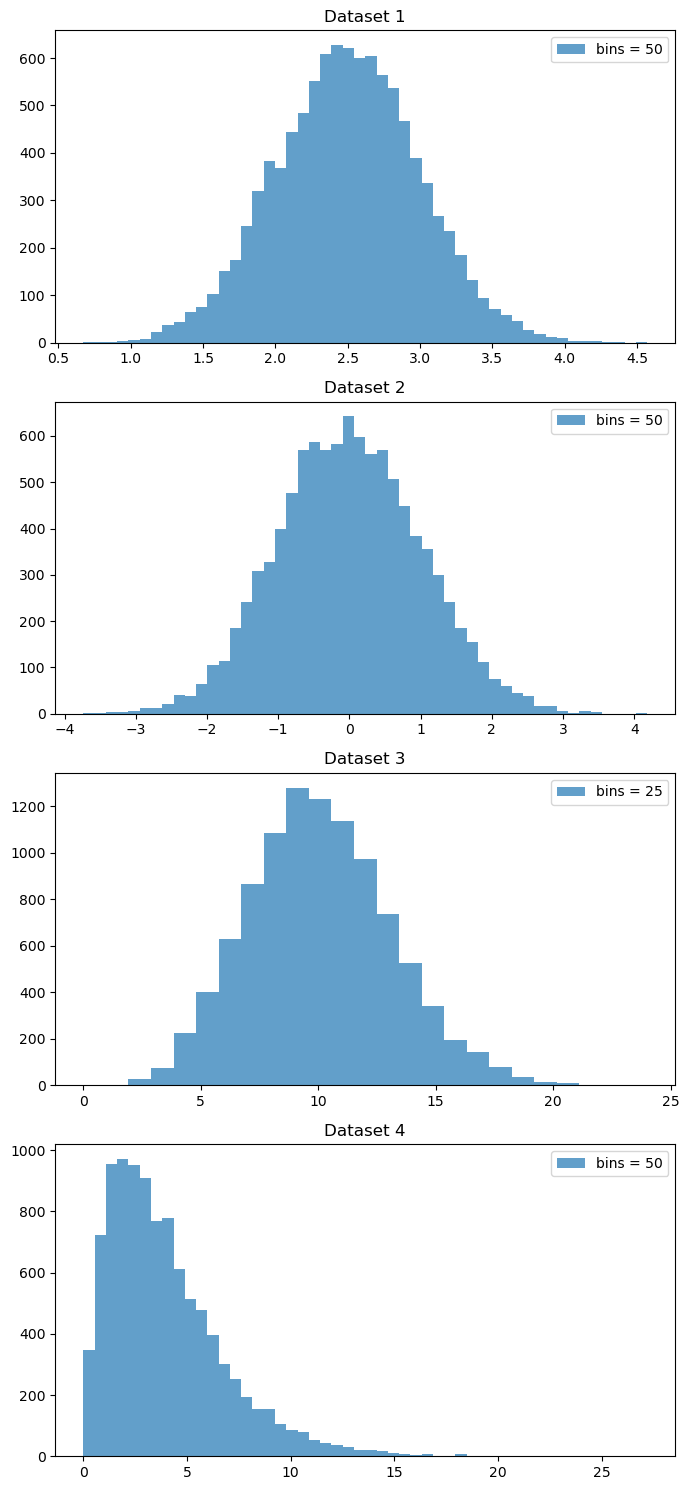

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = []
for i in range(1,5):
    data.append(np.loadtxt(f'mock_data_{i}.txt'))

fig, ax = plt.subplots(4, 1, figsize=(7, 15))
for i in range(4):
    if i!=2:
        ax[i].hist(data[i], bins=50, alpha=0.7, label=f'bins = {50}')
    else:
        ax[i].hist(data[i], bins=25, alpha=0.7, label=f'bins = {25}')
    ax[i].set_title(f'Dataset {i+1}')
    ax[i].legend()
    
plt.tight_layout()
plt.show()


Ans : Dataset 1 and 2 shows similar shape of the histogram, which is roughly symmetrical and gaussian-like bell-shaped. However, Dataset 3 and 4 appears to be gaussian-like but with a slight skewness to the left.
When choosing bin size, I tried to set the bins small enough to show the smootheness of the heights of the bins but not too small that it would be too noisy. For example, Dataset 3 showed empty bins when using 50 bins, so I reduced the number of bins to 25 to get a better representation of the data.

Then calculate the following for each dataset:

1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis

How do you interpret your results for each dataset?